In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [2]:
#f = r.TFile("./data/results_stdp_allCalos_allXtals.root")
f = r.TFile("./data/byCrystals_Updated_calo_04_xtal_35_histogramOutput.root")
f.ls()

TFile**		./data/byCrystals_Updated_calo_04_xtal_35_histogramOutput.root	
 TFile*		./data/byCrystals_Updated_calo_04_xtal_35_histogramOutput.root	
  KEY: TH1D	htime;1	htime
  KEY: TH1D	htime2;1	htime2
  KEY: TH1D	hdeltat;1	#deltat
  KEY: TH3D	h3d_30;1	E_{late} vs. #deltat vs. E_{early} [30 < t_{late} < 100 #mus]
  KEY: TH3D	h3d_100;1	E_{late} vs. #deltat vs. E_{early} [100 < t_{late} < 200 #mus]
  KEY: TH3D	h3d_200;1	E_{late} vs. #deltat vs. E_{early} [200 < t_{late} < 400 #mus]
  KEY: TH3D	h3d_400;1	E_{late} vs. #deltat vs. E_{early} [400 < t_{late} < 700 #mus]


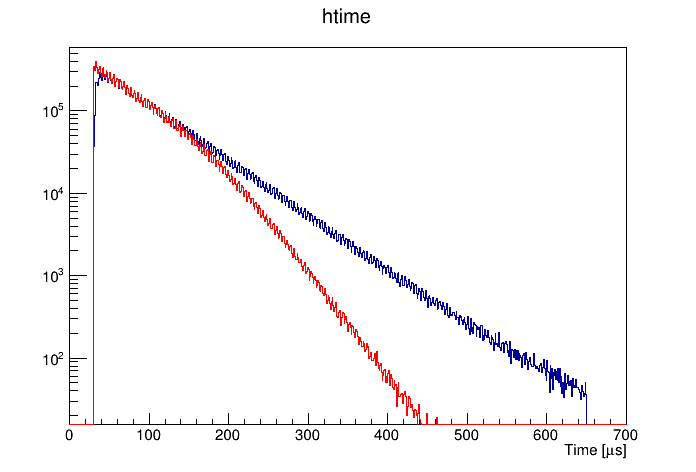

In [3]:
c = r.TCanvas()

htime = f.Get("htime").Clone()

htime2 = f.Get("htime2").Clone()
htime2.SetLineColor(2)

htime.Draw()
htime2.Draw("SAME")

#htime.GetYaxis().SetRangeUser(0.9,100000)
c.SetLogy()
c.Draw()

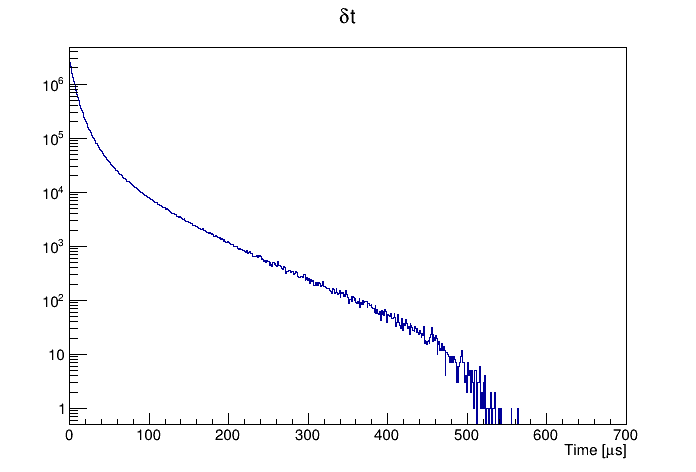

In [4]:
c = r.TCanvas()
hdeltat = f.Get("hdeltat").Clone()
hdeltat.Draw()

#htime.GetYaxis().SetRangeUser(0.9,100000)
c.SetLogy()
c.Draw()

In [5]:
h3d30 = f.Get("h3d_30")
h3d100 = f.Get("h3d_100")
h3d200 = f.Get("h3d_200")
h3d400 = f.Get("h3d_400")

In [40]:
h3d = h3d30.Clone()
h3d.Add(h3d100,1)
h3d.Add(h3d200,1)
h3d.Add(h3d400,1)

h3d.Rebin3D(2,1,10)
nDivs = h3d.GetZaxis().GetNbins()
print(nDivs, r"$E_{early}$ bins")

31 $E_{early}$ bins


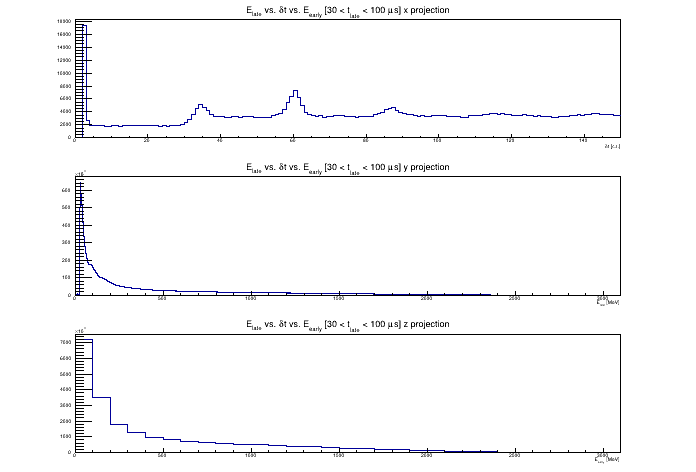

In [41]:
hx = h3d.Project3D("x").Clone()
hy = h3d.Project3D("y").Clone()
hz = h3d.Project3D("z").Clone()
c = r.TCanvas()
c.Divide(1,3)
c.cd(1)
hx.Draw()
c.cd(2)
hy.Draw()
c.cd(3)
hz.Draw()
c.Draw()

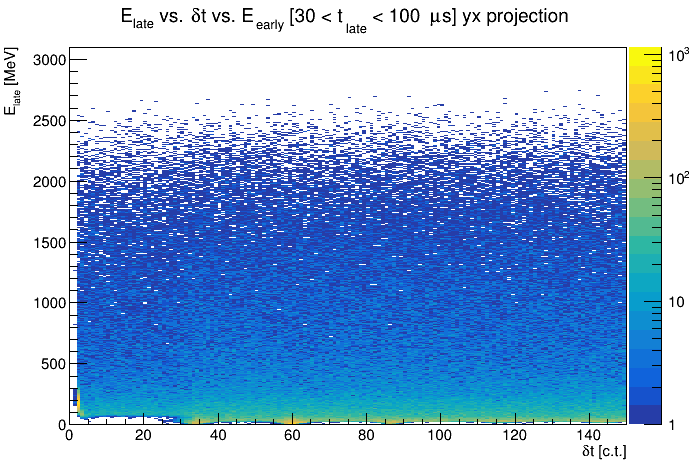

In [42]:
h2d = h3d.Project3D("yx").Clone()
c = r.TCanvas()
h2d.Draw("colz")
c.SetLogz()
c.Draw()

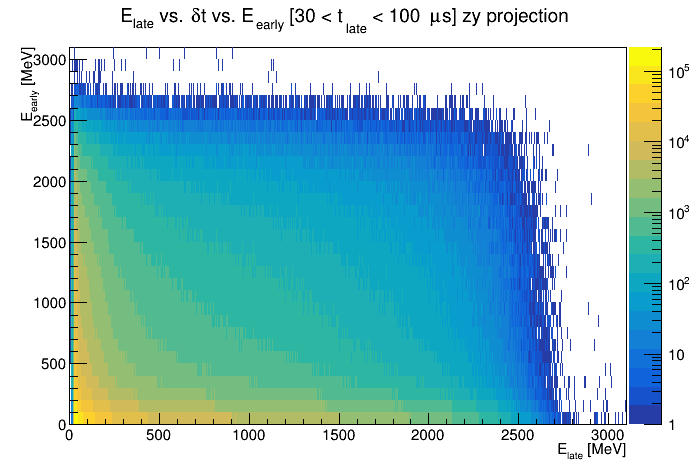

In [43]:
h2d = h3d.Project3D("zy").Clone()
c = r.TCanvas()
h2d.Draw("colz")
c.SetLogz()
c.Draw()

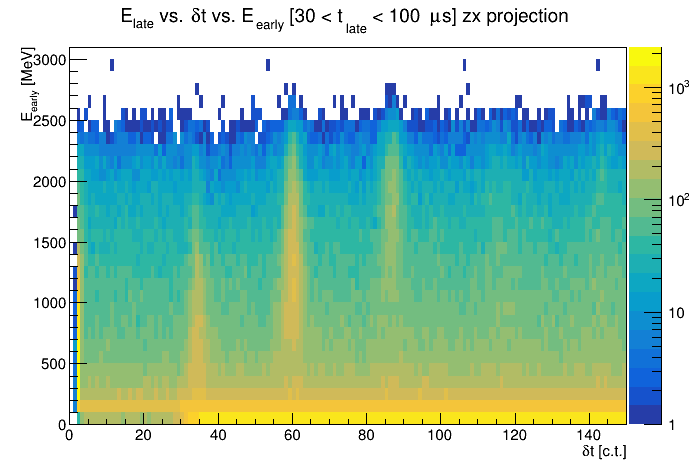

In [44]:
h2d = h3d.Project3D("zx").Clone()
c = r.TCanvas()
h2d.Draw("colz")
c.SetLogz()
c.Draw()

In [47]:
projectionsVec = []
energyBinCenters = []
energyBinWidth = h3d.GetZaxis().GetBinWidth(5)
for bin in range(1,nDivs+1):
    h3d.GetZaxis().SetRange(bin,bin)
    htemp = h3d.Project3D("yx").Clone()
    #htemp.Rebin2D(4,1)
    
    energyBinCenters.append(h3d.GetZaxis().GetBinCenter(bin))
    projectionsVec.append(htemp.Clone("h"+str(bin)))

In [48]:
print(energyBinWidth)
print(energyBinCenters)

100.0
[50.0, 150.0, 250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 950.0, 1050.0, 1150.0, 1250.0, 1350.0, 1450.0, 1550.0, 1650.0, 1750.0, 1850.0, 1950.0, 2050.0, 2150.0, 2250.0, 2350.0, 2450.0, 2550.0, 2650.0, 2750.0, 2850.0, 2950.0, 3050.0]


In [63]:
e1 = 800
e2 = 3000

In [69]:
profileVecFull = []
for i, h in enumerate(projectionsVec):
    #if i > 0:
    #    break
    c = r.TCanvas("c","c",1100,1000)
    h.GetYaxis().SetRangeUser(e1,e2)
    #h.GetYaxis().GetBin
    hprof = h.ProfileX().Clone()
    hprof.GetYaxis().SetRangeUser(e1,e2)
    hprof.SetTitle("Mean value of E_{late} for #deltat ["+str(energyBinCenters[i]-energyBinWidth/2).zfill(1)+" < E_{early} < "+str(energyBinCenters[i]+energyBinWidth/2).zfill(1)+" MeV ]")
    hprof.Draw()
    profileVecFull.append(hprof.Clone())
    c.Draw()
    c.Print("./images/calo4_xtal35_ElateMean_for_deltat_"+str(i).zfill(4)+".png")
    c.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0000.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0001.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0002.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0003.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0004.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0005.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0006.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0007.png has been created
Info in <TCanvas::Print>: png file ./images/calo4_xtal35_ElateMean_for_deltat_0008.png has been cre

In [70]:
len(projectionsVec)

31

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


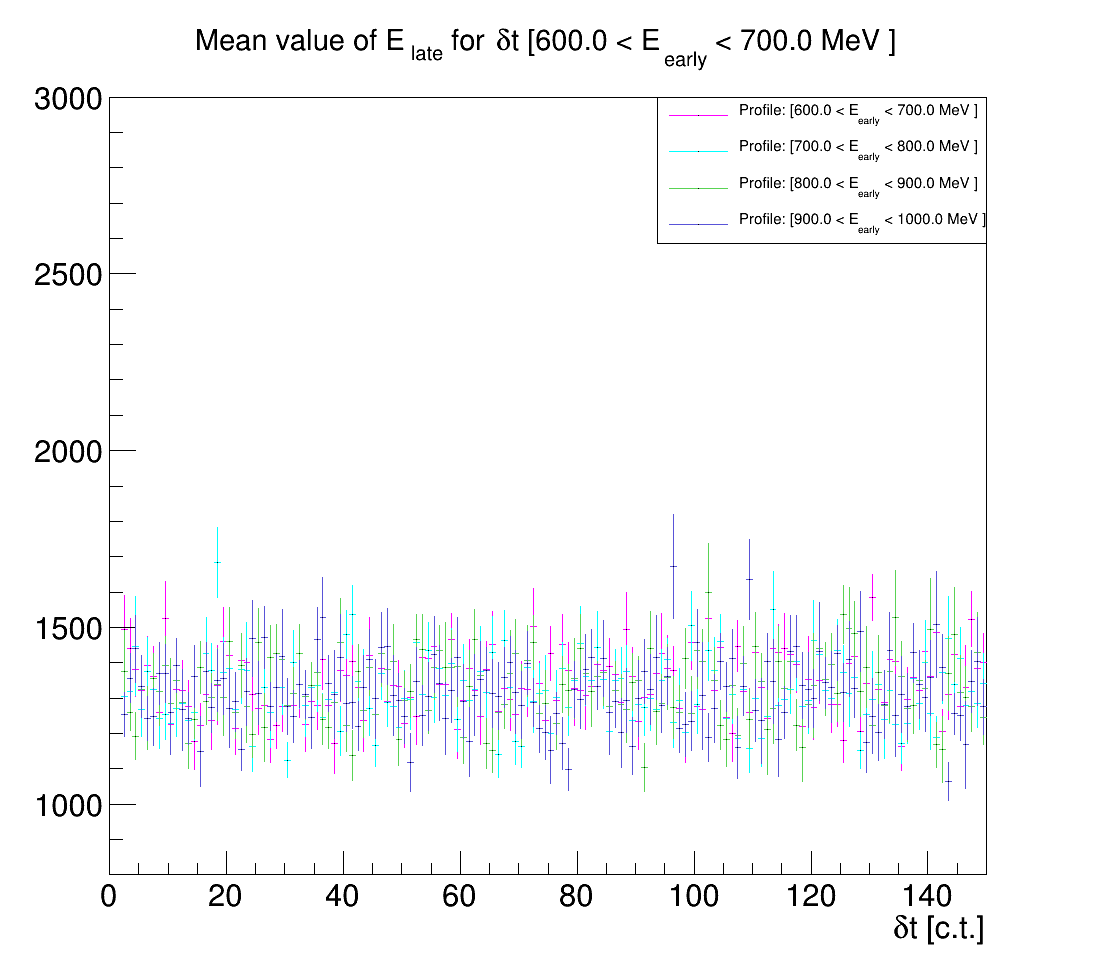

In [76]:
c = r.TCanvas("c","c",1100,1000)
profileVec = []
leg = r.TLegend(0.6,0.75,0.9,0.9)
for i in range(6,10,1):
    Ebin = i
    h = projectionsVec[Ebin]
    h.GetYaxis().SetRangeUser(e1,e2)
    #h.GetYaxis().GetBin
    hprof = h.ProfileX().Clone()
    hprof.GetYaxis().SetRangeUser(e1,e2)
    hprof.SetTitle("Mean value of E_{late} for #deltat")
    hprof.SetLineColor(i+1)
    hprof.SetMarkerColor(i+1)
    
    profileVec.append(hprof.Clone("h"+str(i)))
    
    profileVecFull[i].SetLineColor(i)

    if(i == 0):
        profileVecFull[i].Draw("")
        leg.AddEntry(profileVecFull[i], "Profile: ["+str(energyBinCenters[Ebin]-energyBinWidth/2).zfill(1)+" < E_{early} < "+str(energyBinCenters[Ebin]+energyBinWidth/2).zfill(1)+" MeV ]", "apl")
    else:
        profileVecFull[i].Draw("SAME")
        leg.AddEntry(profileVecFull[i], "Profile: ["+str(energyBinCenters[Ebin]-energyBinWidth/2).zfill(1)+" < E_{early} < "+str(energyBinCenters[Ebin]+energyBinWidth/2).zfill(1)+" MeV ]", "apl")
        
leg.Draw() 
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


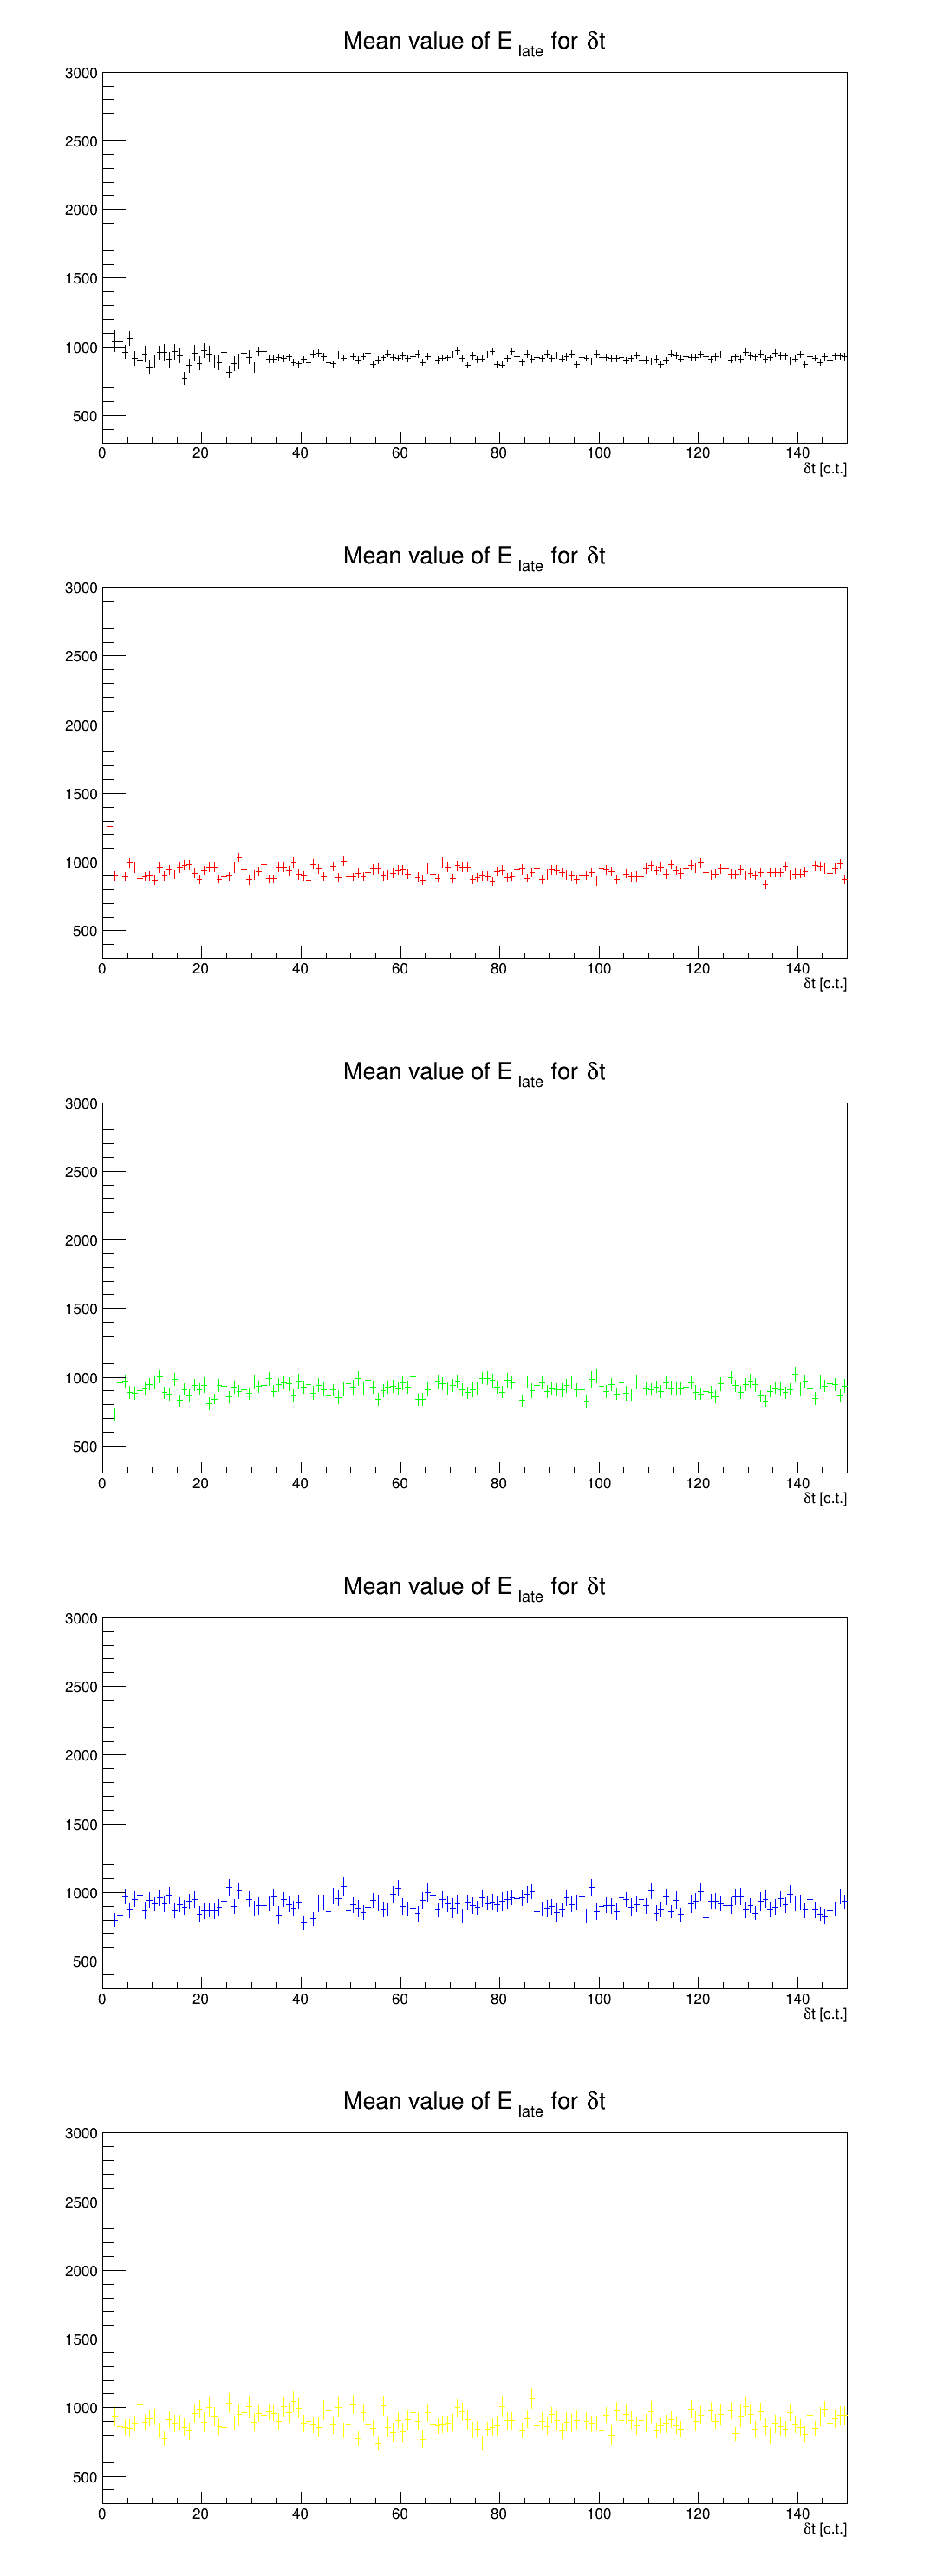

In [53]:
c = r.TCanvas("c","c",1100,3000)
c.Divide(1,len(profileVec))
for i in range(len(profileVec)):
    c.cd(i+1)
    profileVec[i].Draw()
c.Draw()

In [54]:
normedProfiles = []
normFactors = []
for i, h in enumerate(profileVecFull):
    binContents = []
    for i in range(h.GetNbinsX()):
        binContents.append(h.GetBinContent(i))
    normFactor = np.mean(binContents[-10:])
    normFactors.append(normFactor)
    hscaled = h.Clone()
    hscaled.Scale(1/(normFactor))
    normedProfiles.append(hscaled.Clone("h_normed"+str(i)))

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


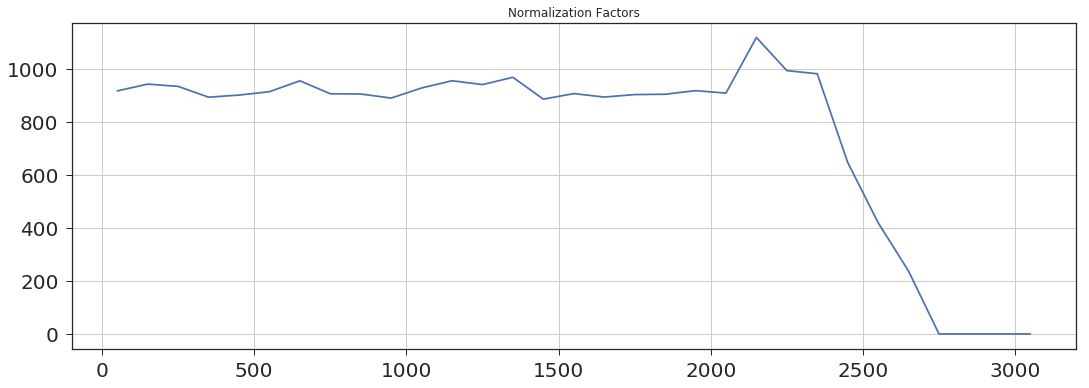

In [55]:
fig,ax = plt.subplots(figsize=(18,6))
plt.plot(energyBinCenters,normFactors)
plt.title("Normalization Factors")
plt.grid()
plt.show()

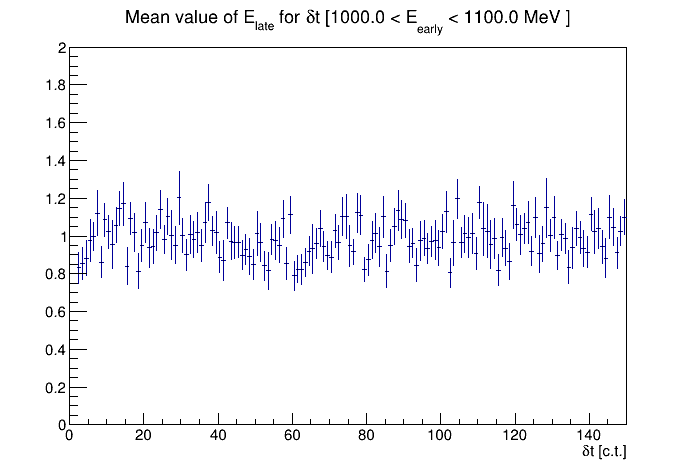

In [62]:
c = r.TCanvas()
normedProfiles[10].GetYaxis().SetRangeUser(0,2)
normedProfiles[10].Draw()
c.Draw()

In [21]:
for i, h in enumerate(normedProfiles):
    c = r.TCanvas()
    h.GetYaxis().SetRangeUser(0,5)
    h.Draw()
    c.Draw()
    c.Print("./images/normedProfiles_"+str(i).zfill(4)+".png")
    c.Close()

Info in <TCanvas::Print>: png file ./images/normedProfiles_0000.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0001.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0002.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0003.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0004.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0005.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0006.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0007.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0008.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0009.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0010.png has been created
Info in <TCanvas::Print>: png file ./images/normedProfiles_0011.p

In [67]:
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def expofit(x, p):
    return 1 - p[0]*r.TMath.Exp(-x[0] / p[1])

func1 = r.TF1("expofit", expofit, 30,150,2)
func1.SetParNames('A','#tau')
func1.SetParameters(1,1)
func1.SetParLimits(0,1,1000000000000)
func1.SetParLimits(1,1,1000000000000)
func1.SetLineColor(2)
func1.SetNpx(1000)

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


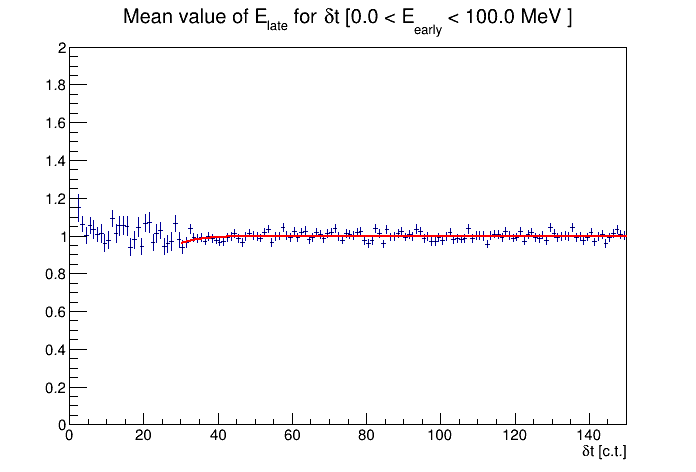

In [68]:
c = r.TCanvas()
normedProfiles[0].GetYaxis().SetRangeUser(0,2)
normedProfiles[0].Draw()

func1.SetParameters(6,6)
func1.Draw("SAME")
c.Draw()

In [69]:
fitPars = []
for i, h in enumerate(normedProfiles):
    #if i > 10:
    #    break
    c = r.TCanvas()
    h.GetYaxis().SetRangeUser(0,2)
    h.Draw()
    func1.SetParameters(6,6)
    for j in range(2):
        h.Fit("expofit","REMB")
    fitPars.append((func1.GetParameter(0), func1.GetParameter(1), func1.GetChisquare()/func1.GetNDF() ))
    c.Draw()
    #c.Print("./images/normedProfiles_"+str(i).zfill(4)+".png")
    c.Close()

ZeroDivisionError: float division by zero

 FCN=114.427 FROM MIGRAD    STATUS=FAILED        170 CALLS         171 TOTAL
                     EDM=44493.2    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            6.94438e+11   2.47166e+11  -0.00000e+00  -6.40800e-03
   2  #tau         1.01144e+00   5.55112e-05   0.00000e+00** at limit **
 FCN=114.416 FROM MINOS     STATUS=PROBLEMS      116 CALLS         352 TOTAL
                     EDM=3.52541e-07    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            9.86143e+11   9.12146e+11  -2.49506e-02  -3.73578e-04
   2  #tau         1.00000e+00   3.05311e-04   3.05311e-04** at limit **
 FCN=135.464 FROM MIGRAD    STATUS=FAILED        142 CALLS         143 TOTAL
                     EDM=299350  

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimi

In [ ]:
for i, h in enumerate(normedProfiles):
    c = r.TCanvas()
    h.GetYaxis().SetRangeUser(0,2)
    h.Draw()
    c.Draw()
    c.Print("./images/normedProfiles_fitFunctions_"+str(i).zfill(4)+".png")
    c.Close()

In [ ]:
As, taus, chisq = zip(*fitPars)
print(As)
print(taus)

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(18,6),sharex=True)

ax[0].set_title("Fit Parameters for Various Energy Bins")
ax[0].plot(energyBinCenters, As, label='A')
#ax[0].set_ylim(0.0000001,1000000000)
ax[0].set_yscale('log')

ax[1].plot(energyBinCenters, taus, label=r'$\tau$')
#ax[1].set_ylim(0.0000001,1000000000)
ax[1].set_yscale('log')

ax[2].plot(energyBinCenters, chisq, label=r'$\chi^2 / NDF$')

for axi in ax:
    axi.grid()
    axi.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(18,6),sharex=True)
ax[0].plot(As[:12],label='A')
ax[1].plot(taus[:12], label=r'$\tau$')
ax[0].legend()
ax[1].legend()
plt.show()